## Performing cluster analysis

In [1]:
!python --version

Python 3.7.3


In [2]:
!pip install scikit-learn

In [3]:
!pip install seaborn

### Import libraries

In [4]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

### Mall Customers

Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

### Load and read datasets from local disk

In [5]:
mall_data = pd.read_csv('datasets/Mall_Customers.csv', 
                        names = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore'],
                        index_col=0, header=1)

mall_data.head()

,Gender,Age,AnnualIncome,SpendingScore
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76


In [6]:
mall_data.shape

(199, 4)

In [7]:
mall_data = mall_data.sample(frac=1, replace=False)

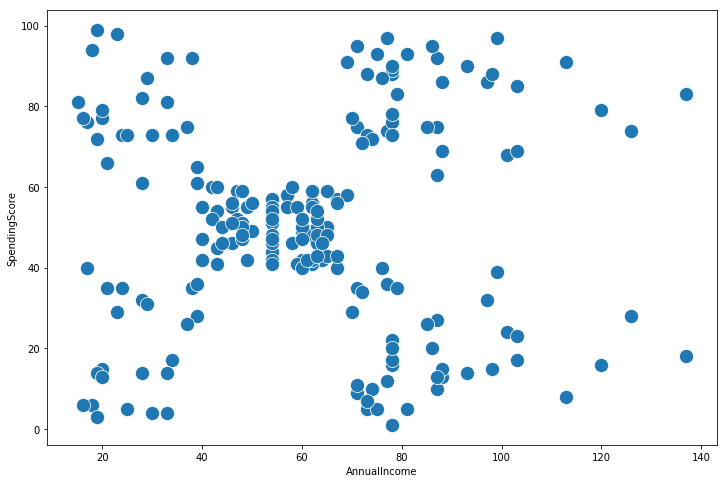

In [8]:
plt.figure(figsize=(12, 8))

sns.scatterplot('AnnualIncome', 
                'SpendingScore',
                data = mall_data,
                s=200)

plt.show()

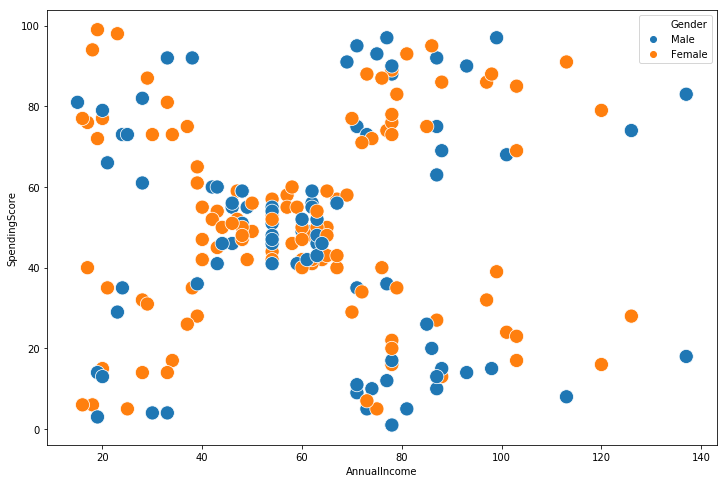

In [9]:
plt.figure(figsize=(12, 8))

sns.scatterplot('AnnualIncome', 
                'SpendingScore',
                hue = 'Gender',
                data = mall_data,
                s=200)

plt.show()

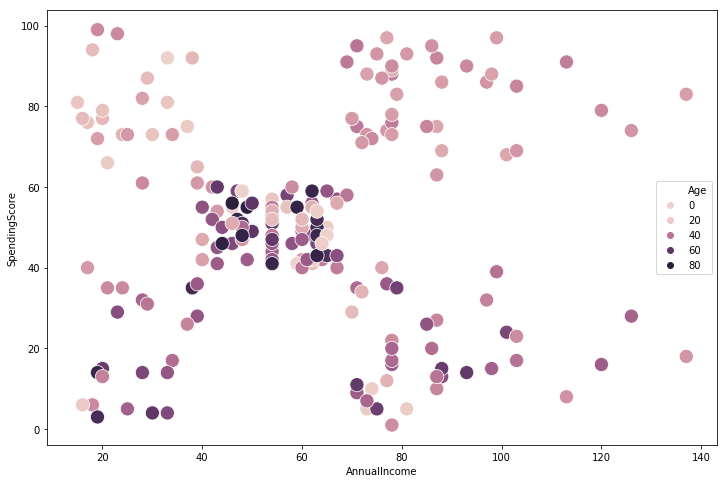

In [10]:
plt.figure(figsize=(12, 8))

sns.scatterplot('AnnualIncome', 
                'SpendingScore',
                hue = 'Age',
                data = mall_data,
                s=200)

plt.show()

In [11]:
features = mall_data[['AnnualIncome', 'SpendingScore']]

features.head()

,AnnualIncome,SpendingScore
173,87,10
53,43,54
174,87,92
125,70,29
32,30,73


In [12]:
X = np.array(features)

X[:10]

array([[ 87,  10],
       [ 43,  54],
       [ 87,  92],
       [ 70,  29],
       [ 30,  73],
       [ 62,  56],
       [ 28,  32],
       [113,   8],
       [ 54,  53],
       [ 18,  94]])

### Import model

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

In [13]:
from sklearn.cluster import KMeans

k_mean = KMeans(n_clusters=3)
k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### Label and cluster centers

In [14]:
cluster_label = k_mean.labels_

cluster_label

array([2, 0, 1, 2, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 1, 1, 2, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0,
       2, 0, 0, 2, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1,
       2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0,
       2], dtype=int32)

In [15]:
centroids = k_mean.cluster_centers_

centroids

array([[44.39344262, 49.91803279],
       [86.53846154, 82.12820513],
       [87.        , 18.63157895]])

### Silhouette score

In [16]:
from sklearn.metrics import silhouette_score

silhou_score = silhouette_score(X, cluster_label)

silhou_score

0.46824208542590284

In [17]:
colors = ['green', 'blue', 'purple', 'red', 'grey']

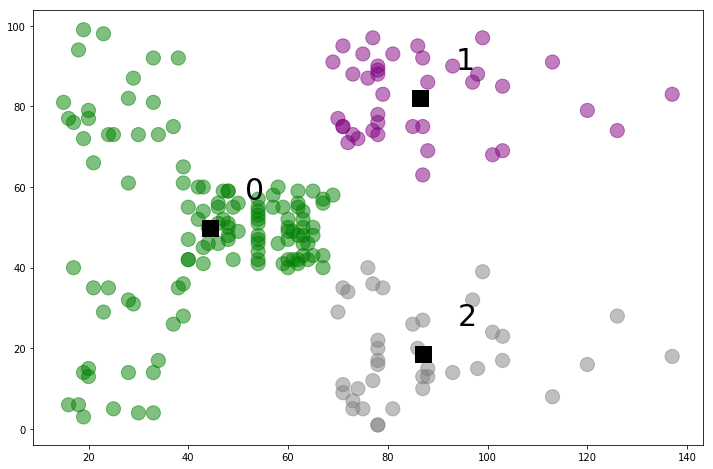

In [18]:
plt.figure(figsize=(12, 8))

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=cluster_label,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [19]:
k_mean = KMeans(n_clusters=5)

k_mean.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
cluster_label = k_mean.labels_

cluster_label

array([1, 2, 4, 1, 0, 2, 3, 1, 2, 0, 2, 4, 1, 2, 4, 0, 0, 1, 4, 4, 1, 2,
       2, 0, 2, 1, 4, 3, 2, 2, 4, 2, 2, 0, 3, 2, 3, 4, 1, 3, 2, 2, 2, 0,
       1, 2, 3, 1, 2, 0, 4, 4, 3, 4, 4, 2, 4, 4, 1, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 4, 2, 2, 1, 2, 1, 4, 4, 2, 2, 2, 2, 2, 3, 2, 1, 4, 4, 3, 1,
       4, 1, 2, 4, 2, 1, 4, 1, 2, 0, 1, 1, 4, 0, 4, 2, 3, 2, 1, 2, 4, 4,
       2, 2, 0, 2, 4, 2, 4, 1, 4, 1, 0, 4, 3, 3, 1, 0, 3, 4, 1, 1, 2, 2,
       2, 2, 3, 2, 0, 0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 4, 2, 2, 1, 2,
       3, 3, 3, 0, 2, 3, 2, 2, 2, 2, 2, 4, 1, 1, 2, 2, 0, 2, 3, 2, 2, 4,
       1, 3, 4, 2, 2, 4, 2, 4, 2, 4, 2, 0, 2, 0, 1, 0, 2, 1, 3, 2, 2, 2,
       1], dtype=int32)

In [21]:
centroids = k_mean.cluster_centers_

centroids

array([[25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [26.81818182, 20.09090909],
       [86.53846154, 82.12820513]])

In [22]:
silhou_score = silhouette_score(X, cluster_label)

silhou_score

0.5552295017995841

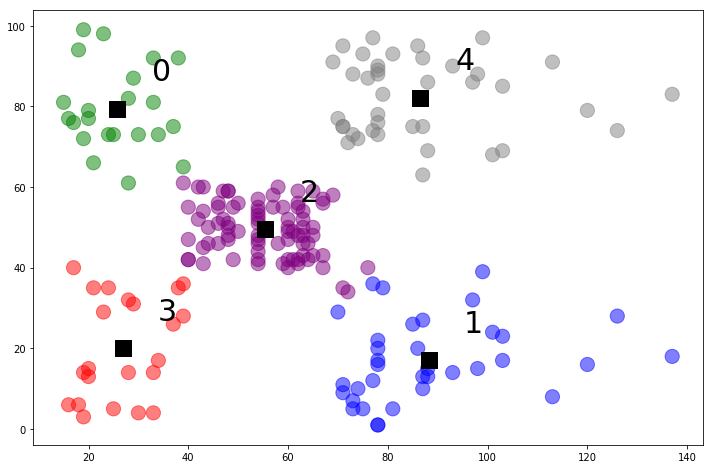

In [23]:
plt.figure(figsize=(12, 8))

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=cluster_label,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [24]:
from sklearn.cluster import AgglomerativeClustering

agglo_cluster = AgglomerativeClustering(n_clusters = 5, linkage='average')
agglo_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=5, pooling_func='deprecated')

In [25]:
agglo_cluster_label = agglo_cluster.labels_

agglo_cluster_label

array([0, 1, 2, 0, 3, 1, 1, 0, 1, 3, 1, 2, 0, 1, 2, 3, 3, 0, 2, 2, 0, 1,
       1, 3, 1, 0, 2, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 2, 0, 1, 1, 1, 0, 3,
       0, 1, 1, 0, 1, 3, 2, 4, 1, 2, 2, 1, 2, 2, 0, 1, 1, 1, 1, 3, 1, 0,
       1, 1, 2, 1, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 0, 1, 3, 0, 0, 2, 3, 2, 1, 1, 1, 0, 1, 2, 2,
       1, 1, 3, 1, 2, 1, 2, 0, 2, 0, 3, 2, 1, 1, 0, 3, 1, 2, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 1, 4, 1, 1, 0, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 1, 1, 3, 1, 1, 1, 1, 4,
       0, 1, 2, 0, 1, 2, 1, 2, 1, 2, 1, 3, 1, 3, 0, 3, 1, 0, 1, 1, 1, 1,
       0])

### Silhouette score

In [26]:
silhou_score = silhouette_score(X, agglo_cluster_label)

silhou_score

0.48247650624950594

### Graphical cluster view.

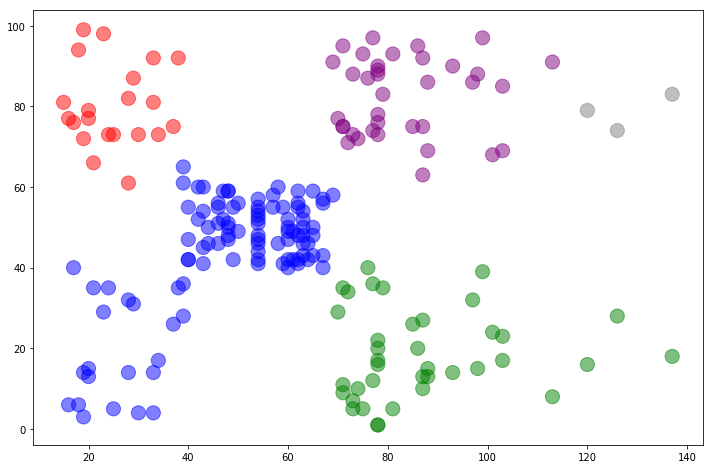

In [27]:
plt.figure(figsize=(12, 8))

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=agglo_cluster_label,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)


#### TODO: While recording - show linkage='average' and then linkage='ward'

In [28]:
from sklearn.cluster import AgglomerativeClustering

agglo_cluster = AgglomerativeClustering(n_clusters = 5, linkage='ward')
agglo_cluster.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=5,
            pooling_func='deprecated')

In [29]:
agglo_cluster_label = agglo_cluster.labels_

agglo_cluster_label

array([0, 2, 1, 2, 3, 2, 4, 0, 2, 3, 2, 1, 0, 2, 1, 3, 3, 0, 1, 1, 0, 2,
       2, 3, 2, 0, 1, 4, 2, 2, 1, 2, 2, 3, 4, 2, 4, 1, 0, 4, 2, 2, 2, 3,
       0, 2, 4, 0, 2, 3, 1, 1, 4, 1, 1, 2, 1, 1, 0, 2, 2, 2, 2, 3, 2, 0,
       2, 2, 1, 2, 2, 0, 2, 0, 1, 1, 2, 2, 2, 2, 2, 4, 2, 0, 1, 1, 4, 0,
       1, 0, 2, 1, 2, 0, 1, 0, 2, 3, 2, 0, 1, 3, 1, 2, 4, 2, 0, 2, 1, 1,
       2, 2, 3, 2, 1, 2, 1, 0, 1, 0, 3, 1, 4, 4, 0, 3, 4, 1, 0, 0, 2, 2,
       2, 2, 4, 2, 3, 3, 4, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 0, 2,
       4, 4, 4, 3, 2, 4, 2, 2, 2, 2, 2, 1, 0, 0, 2, 2, 3, 2, 4, 2, 2, 1,
       0, 4, 1, 2, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 0, 3, 2, 2, 4, 2, 2, 2,
       0])

In [30]:
silhou_score = silhouette_score(X, agglo_cluster_label)

silhou_score

0.5542313841001306

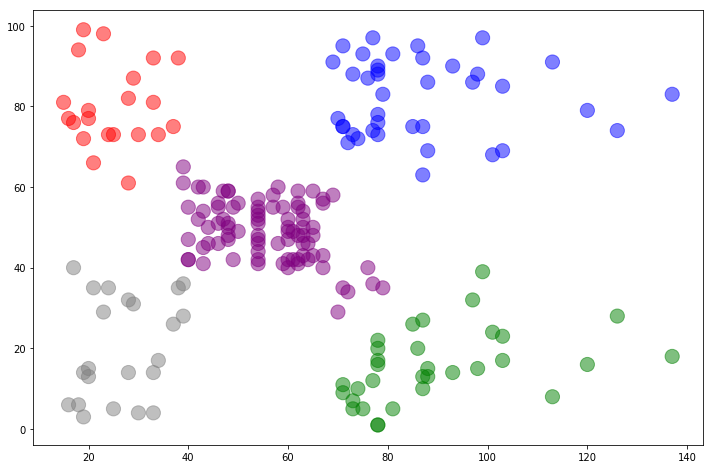

In [31]:
plt.figure(figsize=(12, 8))

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=agglo_cluster_label,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)



In [32]:
from sklearn.cluster import MeanShift

cluster_mean_shift = MeanShift(bandwidth=25).fit(X)

In [33]:
centroids = cluster_mean_shift.cluster_centers_

centroids

array([[54.70238095, 49.36904762],
       [82.25714286, 82.17142857],
       [82.15151515, 18.15151515],
       [27.6       , 77.08      ],
       [26.81818182, 20.09090909]])

### Find cluster label

In [34]:
cluster_labels = cluster_mean_shift.labels_

cluster_labels

array([2, 0, 1, 2, 3, 0, 4, 2, 0, 3, 0, 1, 2, 0, 1, 3, 3, 2, 1, 1, 2, 0,
       0, 3, 0, 2, 1, 4, 0, 0, 1, 0, 0, 3, 4, 0, 4, 1, 2, 4, 0, 0, 2, 3,
       2, 0, 4, 2, 0, 3, 1, 1, 4, 1, 1, 0, 1, 1, 2, 0, 0, 3, 0, 3, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 4, 0, 2, 1, 1, 4, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 3, 2, 2, 1, 3, 1, 0, 4, 0, 2, 0, 1, 1,
       0, 0, 3, 0, 1, 0, 1, 2, 1, 2, 3, 1, 4, 4, 2, 3, 4, 1, 2, 2, 0, 0,
       0, 0, 4, 0, 3, 3, 4, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0,
       4, 4, 4, 3, 0, 4, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 3, 0, 4, 0, 0, 1,
       2, 4, 1, 2, 0, 1, 0, 1, 0, 1, 0, 3, 0, 3, 2, 3, 0, 2, 4, 0, 0, 0,
       2])

### Silhouette score

In [35]:
silhou_score = silhouette_score(X, cluster_labels)
silhou_score

0.5526558484447762

### Graphical view

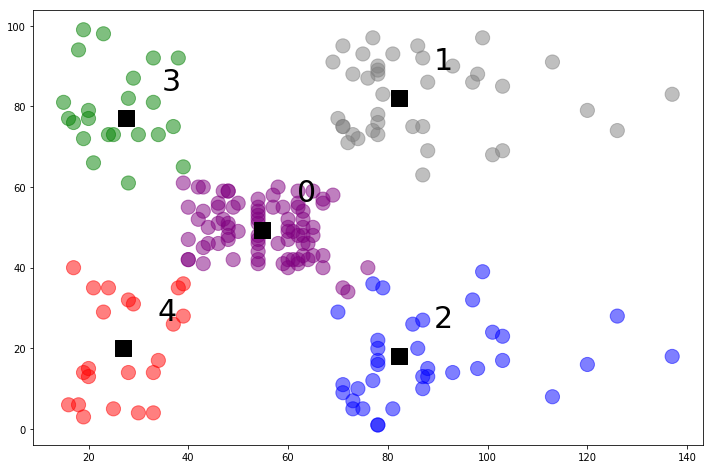

In [36]:
plt.figure(figsize=(12, 8))

plt.scatter(features['AnnualIncome'], features['SpendingScore'], 
            s=200, c=cluster_label,
            cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='k', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate( i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)